In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

Polynomial linear regression is an extension of linear regression that allows for modeling nonlinear relationships between the dependent variable and the independent variable(s) by introducing polynomial terms. It involves fitting a polynomial function to the data instead of a straight line.

The equation for polynomial linear regression can be written as:

y = β0 + β1x + β2x^2 + β3x^3 + ... + βnx^n + ε

Where:
- y represents the dependent variable (response variable).
- x represents the independent variable (predictor variable).
- β0, β1, β2, ..., βn represent the coefficients that determine the shape of the polynomial curve.
- ε represents the error term.

In polynomial linear regression, the degree of the polynomial determines the complexity of the curve that fits the data. For example, a polynomial of degree 2 would introduce a quadratic term (x^2), degree 3 would introduce a cubic term (x^3), and so on.

The goal of polynomial linear regression is to estimate the values of the β coefficients that minimize the sum of squared differences between the observed values of y and the predicted values based on the polynomial model. This is typically done using the least squares method.

By introducing higher-degree polynomial terms, polynomial linear regression can capture more complex patterns and nonlinear relationships between the variables. However, it's important to be cautious about overfitting, where the model becomes too complex and fits the noise in the data rather than the true underlying relationship. Regularization techniques or model selection methods can help address overfitting in polynomial regression.

Polynomial linear regression is commonly used in various fields such as physics, engineering, and data analysis, where nonlinear relationships between variables are expected or observed.

# To perform polynomial linear regression, you can use the following algorithm:

1. Gather your data: Collect the data for your dependent variable (y) and independent variable (x). 
2. Choose the degree of the polynomial: Decide on the degree of the polynomial that you want to fit to your data. This determines the complexity of the curve.

3. Create the polynomial features: Generate additional features by raising the independent variable (x) to the appropriate powers, up to the chosen degree. For example, if the chosen degree is 2, you would create an additional feature x^2.

4. Construct the design matrix: Create a design matrix X that includes the original independent variable (x) and the additional polynomial features. Each row of X represents a data point, and each column represents a feature.

5. Normalize the features (optional): It may be beneficial to normalize the features to have zero mean and unit variance, especially if they have significantly different scales. This step helps prevent one feature from dominating the others.

6. Fit the polynomial regression model: Use a method like least squares to estimate the coefficients β that minimize the sum of squared differences between the observed values of y and the predicted values based on the polynomial model. This step involves solving a system of equations.

7. Evaluate the model:  you can evaluate the performance of the model. Calculate metrics such as mean squared error (MSE) or R-squared to assess how well the model fits the data.

8. Make predictions: Use the trained polynomial regression model to make predictions on new data by plugging in the values of the independent variable (x) into the polynomial equation.

9. Visualize the results: Plot the observed data points along with the fitted polynomial curve to visualize the relationship between the variables.

# simple polynomial linear Regression 

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

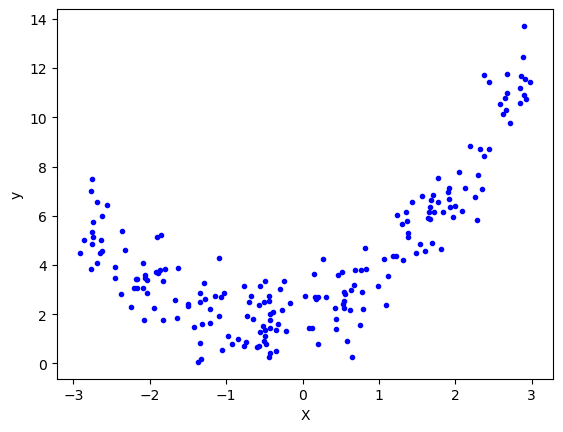

In [3]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
# Applying linear regression
lr = LinearRegression()

In [6]:
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.01839791886002895

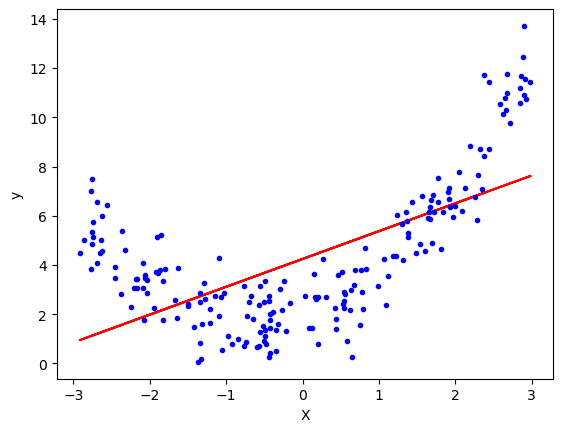

In [8]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [9]:

# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

#inclulde_bias

In [10]:
print(X_train[0])
print(X_train_trans[0])

[2.37479883]
[1.         2.37479883 5.63966948]


In [11]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test_trans)

In [13]:
r2_score(y_test,y_pred)

0.7804499010890638

In [14]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.98857876 0.80949221]]
[1.89703914]


In [15]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

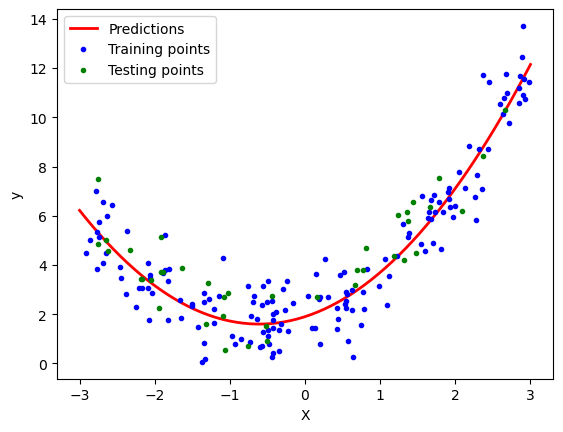

In [16]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [17]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

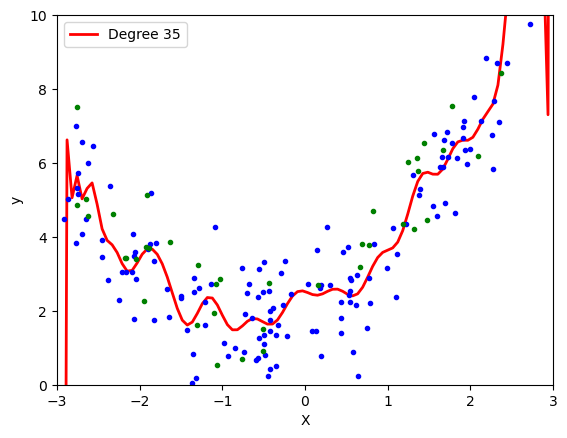

In [18]:
polynomial_regression(35)

In [19]:
poly.powers_

array([[0],
       [1],
       [2]])

# Applying Gradient Descent


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


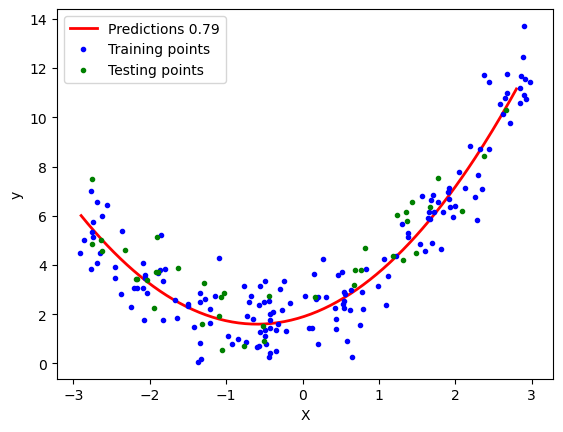

In [20]:

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Multiple Polnomial linear Regression

In [21]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [22]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [23]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [24]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [25]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [26]:
poly = PolynomialFeatures(degree=3)
X_multi_trans = poly.fit_transform(X_multi)

In [27]:

print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Ouput 10
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]]


In [28]:
X_multi_trans.shape

(100, 10)

In [29]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [30]:
X_test_multi = poly.transform(final)
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [31]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()